In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 148s 1us/step


In [3]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Class names for plotting
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24056\2132463022.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


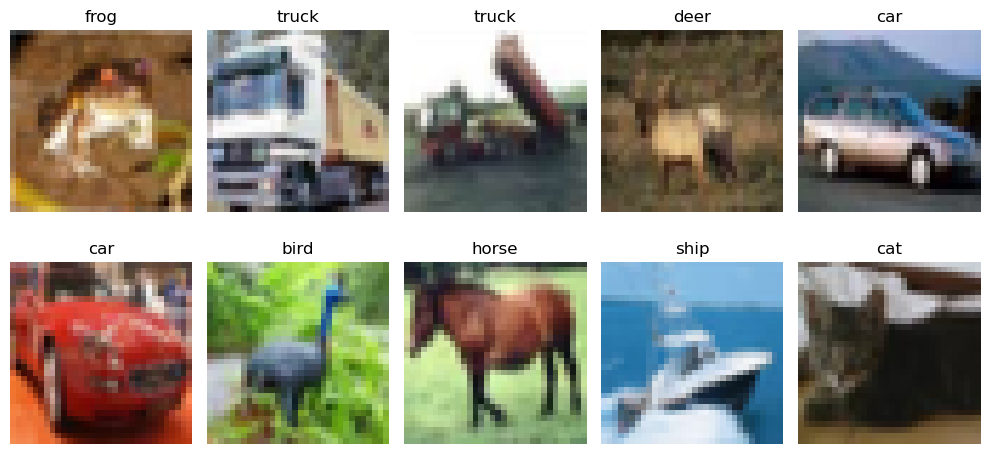

In [5]:
# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.3570 - loss: 1.7469 - val_accuracy: 0.5531 - val_loss: 1.2464
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.5768 - loss: 1.1943 - val_accuracy: 0.6171 - val_loss: 1.0827
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.6433 - loss: 1.0080 - val_accuracy: 0.6446 - val_loss: 1.0003
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6849 - loss: 0.8997 - val_accuracy: 0.6801 - val_loss: 0.9092
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.7102 - loss: 0.8278 - val_accuracy: 0.6939 - val_loss: 0.8901
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.7378 - loss: 0.7474 - val_accuracy: 0.7025 - val_loss: 0.8626
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7496 - loss: 0.7151 - val_accuracy: 0.7085 - val_loss: 0.8533
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7653 -

In [9]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.7138 - loss: 0.8443

Test accuracy: 0.7138


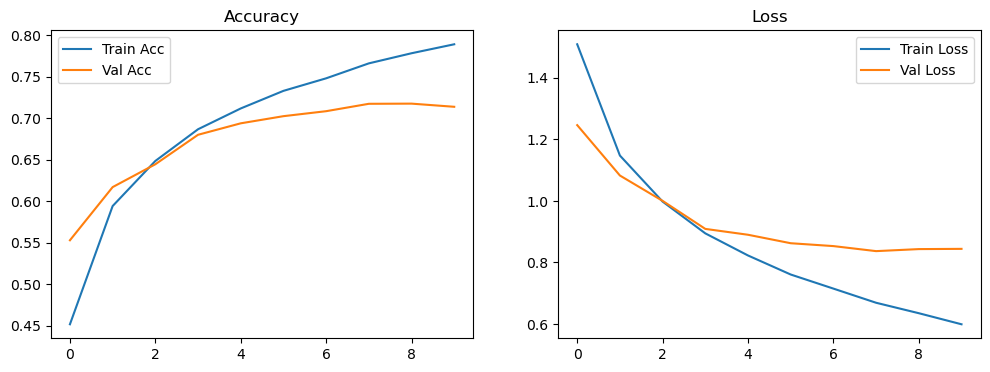

In [10]:
# Plot training results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [11]:
# Predict and visualize
prob_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = prob_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24056\2140988770.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label, img = int(true_label[i]), img[i]


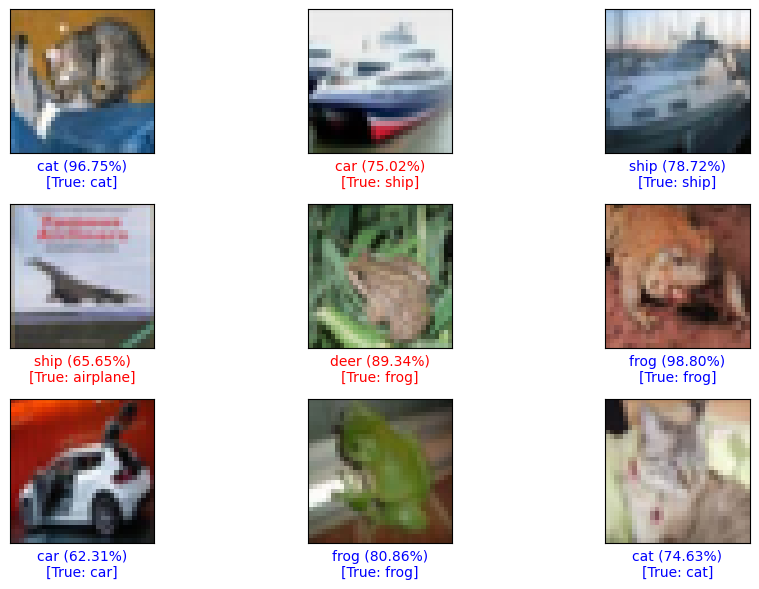

In [12]:
# Visualize predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = int(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\n[True: {class_names[true_label]}]", color=color)

plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()